In [1]:
%%capture
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go


from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import torch

In [2]:
train_data_original = pd.read_csv("train.csv")
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:

# Adding new column
train_data["BMI"] = train_data["Weight"] / (train_data['Height'] ** 2)

train_data['Gender'] = train_data['Gender'].map({'Male':  1, 'Female':  0})
train_data['FAVC'] = train_data['FAVC'].map({'yes':  1, 'no':  0})
train_data['SCC'] = train_data['SCC'].map({'yes':  1, 'no':  0})
train_data['SMOKE'] = train_data['SMOKE'].map({'yes':  1, 'no':  0})
train_data['family_history_with_overweight'] = train_data['family_history_with_overweight'].map({'yes':  1, 'no':  0})
train_data['CAEC'] = train_data['CAEC'].map({'no':  0, 'Sometimes':  1, 'Frequently': 2, "Always": 3})
train_data['CALC'] = train_data['CALC'].map({'no':  0, 'Sometimes':  1, 'Frequently': 2})
train_data['MTRANS'] = train_data['MTRANS'].map({'Public_Transportation':  0, 'Automobile':  1, 'Walking': 2, "Motorbike": 3})
train_data['NObeyesdad'] = train_data['NObeyesdad'].map({'Overweight_Level_II': 0, 'Normal_Weight': 1, 'Insufficient_Weight': 2, 'Obesity_Type_III': 3, 'Obesity_Type_II': 4, 'Overweight_Level_I': 5, 'Obesity_Type_I': 6})

In [4]:
train_data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,2.763573,0,0.000000,0.976473,1,0.0,0,28.259565
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,1.0,1,23.422091
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,1.910378,0,0.866045,1.673584,0,0.0,2,17.126706
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,1.674061,0,1.467863,0.780199,1,0.0,3,44.855798
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,1.979848,0,1.967973,0.931721,1,0.0,0,25.599151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,1,0,2.151809,0,1.330519,0.196680,1,0.0,4,36.587084
20754,20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,2,0,1.000000,0,2.000000,1.000000,1,0.0,2,17.099278
20755,20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,1,0,2.000000,0,1.158040,1.198439,0,0.0,4,31.889841
20756,20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,1,0,2.144838,0,0.000000,0.973834,0,1.0,0,28.899693


In [5]:
train = train_data.drop(['id'], axis=1)
test = test_data.drop(['id'], axis=1)

In [6]:
train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,2.763573,0,0.000000,0.976473,1,0.0,0,28.259565
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,1.0,1,23.422091
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,1.910378,0,0.866045,1.673584,0,0.0,2,17.126706
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,1.674061,0,1.467863,0.780199,1,0.0,3,44.855798
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,1.979848,0,1.967973,0.931721,1,0.0,0,25.599151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,1,0,2.151809,0,1.330519,0.196680,1,0.0,4,36.587084
20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,2,0,1.000000,0,2.000000,1.000000,1,0.0,2,17.099278
20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,1,0,2.000000,0,1.158040,1.198439,0,0.0,4,31.889841
20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,1,0,2.144838,0,0.000000,0.973834,0,1.0,0,28.899693


In [7]:
X = train.drop(['NObeyesdad'], axis=1)
y = train['NObeyesdad']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# Best parameters obtained from Optuna optimization from notebook in comments
# https://www.kaggle.com/code/moazeldsokyx/pgs4e2-highest-score-lgbm-hyperparameter-tuning/notebook

best_params = {
    "objective": "multiclass",          # Objective function for the model
    "metric": "multi_logloss",          # Evaluation metric
    "verbosity": -1,                    # Verbosity level (-1 for silent)
    "boosting_type": "gbdt",            # Gradient boosting type
    "random_state": 42,       # Random state for reproducibility
    "num_class": 7,                     # Number of classes in the dataset
    'learning_rate': 0.030962211546832760,  # Learning rate for gradient boosting
    'n_estimators': 500,                # Number of boosting iterations
    'lambda_l1': 0.009667446568254372,  # L1 regularization term
    'lambda_l2': 0.04018641437301800,   # L2 regularization term
    'max_depth': 10,                    # Maximum depth of the trees
    'colsample_bytree': 0.40977129346872643,  # Fraction of features to consider for each tree
    'subsample': 0.9535797422450176,    # Fraction of samples to consider for each boosting iteration
    'min_child_samples': 26             # Minimum number of data needed in a leaf
}

In [10]:
lgbm_classifier = LGBMClassifier(**best_params)
lgbm_classifier.fit(X_train, y_train)
y_pred = lgbm_classifier.predict(X_val)

In [11]:
accuracy_score(y_val, y_pred) 

0.9079961464354528

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       514
           1       0.89      0.89      0.89       626
           2       0.94      0.94      0.94       524
           3       1.00      1.00      1.00       804
           4       0.98      0.97      0.97       657
           5       0.80      0.80      0.80       484
           6       0.87      0.87      0.87       543

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



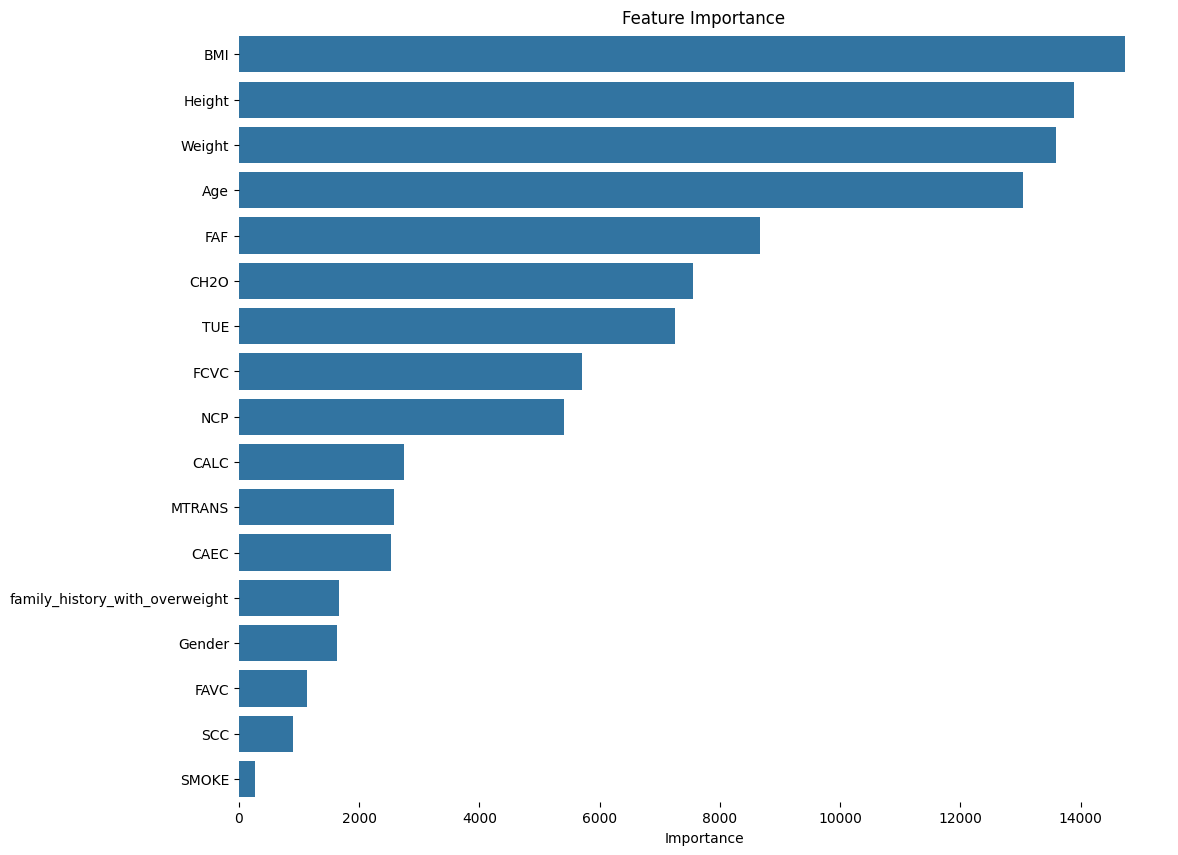

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# feature importances
feature_importance = lgbm_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

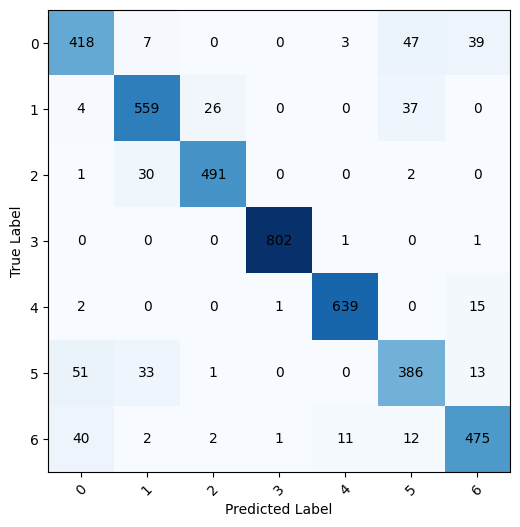

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
# Confusion matrix
def plot_confusion_matrix(y_val, y_pred):
    
    plt.figure(figsize=(15, 6))
    conf_matrix = confusion_matrix(y_val, y_pred)
    conf_labels = [f'{i}' for i in range(conf_matrix.shape[0])]
    conf_matrix_df = pd.DataFrame(conf_matrix, columns=conf_labels, index=conf_labels)
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.xticks(np.arange(conf_matrix.shape[0]), conf_labels, rotation=45)
    plt.yticks(np.arange(conf_matrix.shape[0]), conf_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
    plt.grid(False)
    plt.show()
    
plot_confusion_matrix(y_val, y_pred)

In [15]:
# predictions = lgbm_classifier.predict(test)

In [16]:
# I forgot original data lacked bmi column
test.shape, X.shape

((13840, 16), (20758, 17))

In [17]:
test['BMI'] = test['Weight'] / (test['Height'] ** 2)

test['Gender'] = test['Gender'].map({'Male':  1, 'Female':  0})
test['FAVC'] = test['FAVC'].map({'yes':  1, 'no':  0})
test['SCC'] = test['SCC'].map({'yes':  1, 'no':  0})
test['SMOKE'] = test['SMOKE'].map({'yes':  1, 'no':  0})
test['family_history_with_overweight'] = test['family_history_with_overweight'].map({'yes':  1, 'no':  0})
test['CAEC'] = test['CAEC'].map({'no':  0, 'Sometimes':  1, 'Frequently': 2, "Always": 3})
test['CALC'] = test['CALC'].map({'no':  0, 'Sometimes':  1, 'Frequently': 2})
test['MTRANS'] = test['MTRANS'].map({'Public_Transportation':  0, 'Automobile':  1, 'Walking': 2, "Motorbike": 3})
# test['NObeyesdad'] = test['NObeyesdad'].map({'Overweight_Level_II': 0, 'Normal_Weight': 1, 'Insufficient_Weight': 2, 'Obesity_Type_III': 3, 'Obesity_Type_II': 4, 'Overweight_Level_I': 5, 'Obesity_Type_I': 6})

In [18]:
predictions = lgbm_classifier.predict(test)

# ~91% acc solution

In [19]:
submission = pd.read_csv("sample_submission.csv")
submission["NObeyesdad"] = predictions
submission['NObeyesdad'] = submission['NObeyesdad'].map({0: 'Overweight_Level_II', 1: 'Normal_Weight', 2: 'Insufficient_Weight', 3: 'Obesity_Type_III', 4: 'Obesity_Type_II', 5: 'Overweight_Level_I', 6:'Obesity_Type_I'})
submission.to_csv("submission1.csv", index=False)
submission.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


# Let's do standard scaling this time

In [21]:
train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,2.763573,0,0.000000,0.976473,1,0.0,0,28.259565
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,1.0,1,23.422091
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,1.910378,0,0.866045,1.673584,0,0.0,2,17.126706
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,1.674061,0,1.467863,0.780199,1,0.0,3,44.855798
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,1.979848,0,1.967973,0.931721,1,0.0,0,25.599151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,1,0,2.151809,0,1.330519,0.196680,1,0.0,4,36.587084
20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,2,0,1.000000,0,2.000000,1.000000,1,0.0,2,17.099278
20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,1,0,2.000000,0,1.158040,1.198439,0,0.0,4,31.889841
20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,1,0,2.144838,0,0.000000,0.973834,0,1.0,0,28.899693


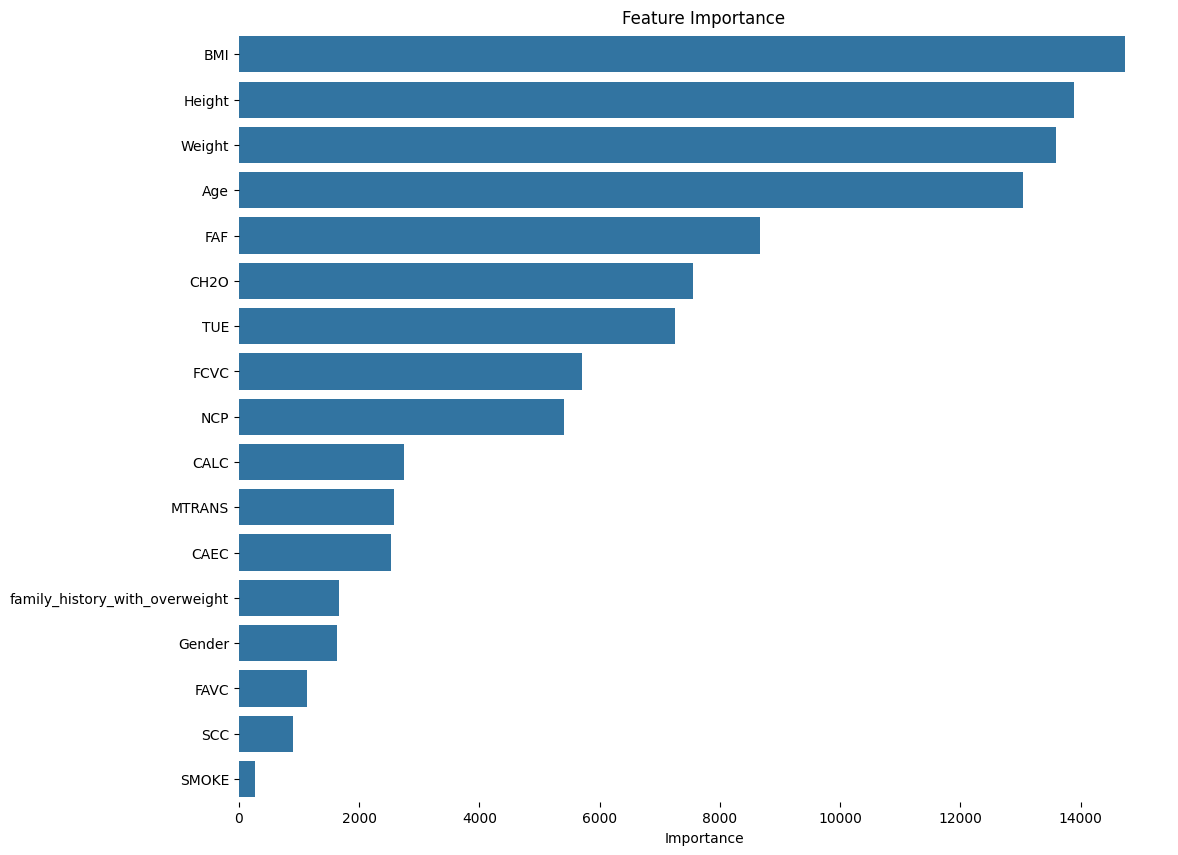

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# feature importances
feature_importance = lgbm_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

In [21]:
test.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'BMI'],
      dtype='object')

In [22]:
test.select_dtypes(include=['category', 'object']).columns

Index([], dtype='object')

In [23]:
# test = pd.get_dummies(test, columns=test.select_dtypes(include=['category', 'object']).columns, drop_first=True)

In [24]:
test

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,1,0,2.825629,0,0.855400,0.000000,1.0,0.0,35.315411
1,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,1,0,3.000000,0,1.000000,0.000000,1.0,0.0,25.781250
2,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,1,0,2.621877,0,0.000000,0.250502,1.0,0.0,41.324115
3,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,1,0,2.786417,0,0.094851,0.000000,1.0,0.0,42.976937
4,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,1,0,2.653531,0,0.000000,0.741069,1.0,0.0,39.584143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1,23.327836,1.721384,78.030383,1,0,2.813234,3.000000,1,0,1.000000,0,0.807076,0.778632,1.0,0.0,26.333478
13836,0,29.000000,1.590000,62.000000,0,1,3.000000,3.000000,1,0,2.000000,0,0.000000,0.000000,1.0,0.0,24.524346
13837,0,22.935612,1.585547,44.376637,0,1,3.000000,2.273740,2,0,2.000000,0,1.949840,1.000000,1.0,0.0,17.652091
13838,1,21.000000,1.620000,53.000000,1,1,2.000000,3.000000,1,0,2.000000,0,3.000000,2.000000,0.0,0.0,20.195092


In [25]:
predictions = lgbm_classifier.predict(test)